In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_greedy = pd.read_csv("./data/data_greedy.csv")
df_brute = pd.read_csv("./data/data_brute.csv")
df_branch = pd.read_csv("./data/data_branch.csv")
df_fancy = pd.read_csv("./data/data_fancy.csv")

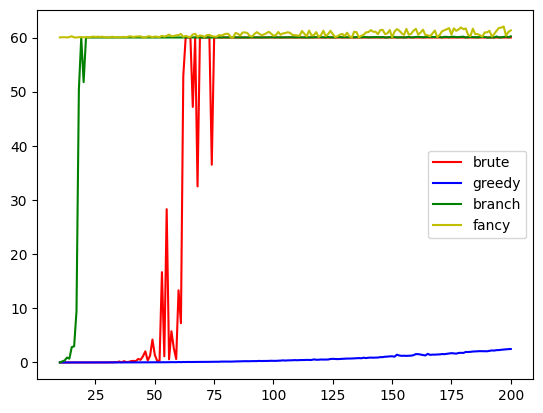

In [5]:
plt.plot(df_brute["# Cities"], df_brute["Running time (sec.)"], color="r", label="brute")
plt.plot(df_greedy["# Cities"], df_greedy["Running time (sec.)"], color="b", label="greedy")
plt.plot(df_branch["# Cities"], df_branch["Running time (sec.)"], color="g", label="branch")
plt.plot(df_fancy["# Cities"], df_fancy["Running time (sec.)"], color="y", label="fancy")
plt.legend()
plt.show()


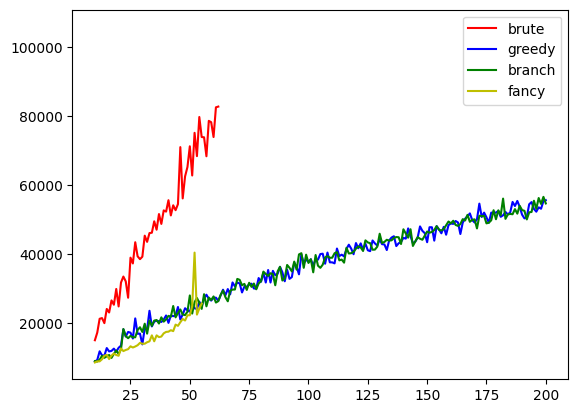

In [6]:
plt.plot(df_brute["# Cities"], df_brute["Cost of best tour found (*=optimal)"], color="r", label="brute")
plt.plot(df_greedy["# Cities"], df_greedy["Cost of best tour found (*=optimal)"], color="b", label="greedy")
plt.plot(df_branch["# Cities"], df_branch["Cost of best tour found (*=optimal)"], color="g", label="branch")
plt.plot(df_fancy["# Cities"], df_fancy["Cost of best tour found (*=optimal)"], color="y", label="fancy")
plt.legend()
plt.show()